# Environment

In [32]:
import pandas as pd
import yaml
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load config
CONFIG_PATH = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment/config.yaml"

# Specify which configuration to use (1-based index)
# Change this to select different configurations
CONFIG_NUMBER = 2

with open(CONFIG_PATH, 'r') as f:
    # Load all documents from the YAML file
    configs = list(yaml.safe_load_all(f))

# Select the specific configuration (subtract 1 because list is 0-based)
config = configs[CONFIG_NUMBER - 1]

# Get values from the selected config
BASE_DIR = config['base_dir']
RUN_NAME = config['run_name']
CELL_TYPE = config['cell_type']
ALIGNMENT_TYPE = config['alignment_type']
PEAKS_TYPE = config['peaks_type']

ENRICHMENT_FILE = f"{BASE_DIR}/results/{ALIGNMENT_TYPE}/cpg_enrichment/{CELL_TYPE}/{PEAKS_TYPE}/{RUN_NAME}/cpg_enrichment_parallel.csv"
print(ENRICHMENT_FILE)

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents

sys.path.append("/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment")
try:
    import functions
    importlib.reload(functions)
    from functions import *
except ModuleNotFoundError:
    print("Warning: Could not import functions module. Make sure functions.py exists in the code7_cpg_enrichment directory.")


/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/NSC/broad/cpg_enrichment_2_rep_in_cpg/cpg_enrichment_parallel.csv


# Load Data

In [33]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(ENRICHMENT_FILE)

In [34]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (12725, 32)

First few rows:


,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
0,chr1,3671654,3672156,502,613,CpG:,13.596750,18.921372,0.718592,1.0,both,exo_only,False,3,3,3,3,"3.061797170525053,5.682240710315476,32.046211683417695","35.88782899408226,18.74866663412269,2.1276208831969488",1,0,5.54931;6.06037,NaN,3671654,3672156,502,13.089529,13.783088,0.962695,0.728440,2,0
1,chr1,4491701,4493673,1972,619,CpG:,7.108247,7.530761,0.943895,1.0,both,exo_only,False,2,2,3,3,"12.19944750513073,0.0,9.125292064210223","0.0,19.079104030833523,3.513177480949108",1,0,6.0982;5.8282,4.1282,4491701,4493673,1972,5.180604,8.290910,0.728816,1.100939,2,1
2,chr1,4571641,4572075,434,619,CpG:,29.865143,0.137681,216.916069,0.5,exo_only,exo_only,False,3,1,3,3,"16.923790716355846,19.305170516264603,53.36646880312449","0.4130419223539291,0.0,0.0",1,0,4.35039;6.82732;3.40697,NaN,4571641,4572075,434,16.646360,0.194710,0.557384,1.414214,3,0
3,chr1,4785376,4785814,438,621,CpG:,64.392939,62.625671,1.028220,1.0,both,both,False,3,3,3,3,"79.64513432054216,90.87383952206129,22.65984181617493","109.42149067360516,56.15474365617587,22.300778912082656",1,1,2.96862;6.6373;7.27926,12.2007;6.57158;5.01142,4785376,4785814,438,29.863684,35.859999,0.463773,0.572609,3,3
4,chr1,4807559,4808103,544,621,CpG:,36.356446,11.776893,3.087100,0.7,both,exo_only,False,3,3,3,3,"35.17831939809463,5.216560994877534,68.67445693997776","6.757579873589909,7.732353210449219,20.84074580494095",1,1,4.55161;7.91139;6.13029,3.25084,4807559,4808103,544,25.919968,6.421455,0.712940,0.545259,3,1



Column names:
['chr', 'start', 'end', 'cpg_length', 'cpg_name', 'cpg_score', 'exo_signal', 'endo_signal', 'enrichment', 'pvalue', 'binding_type', 'binding_type_by_peaks', 'significant', 'exo_replicates_with_signal', 'endo_replicates_with_signal', 'total_exo_replicates', 'total_endo_replicates', 'exo_replicate_signals', 'endo_replicate_signals', 'n_exo_peaks', 'n_endo_peaks', 'exo_peak_scores_by_rep', 'endo_peak_scores_by_rep', 'analysis_start', 'analysis_end', 'analysis_length', 'exo_signal_std', 'endo_signal_std', 'exo_signal_cv', 'endo_signal_cv', 'exo_replicates_with_peaks', 'endo_replicates_with_peaks']


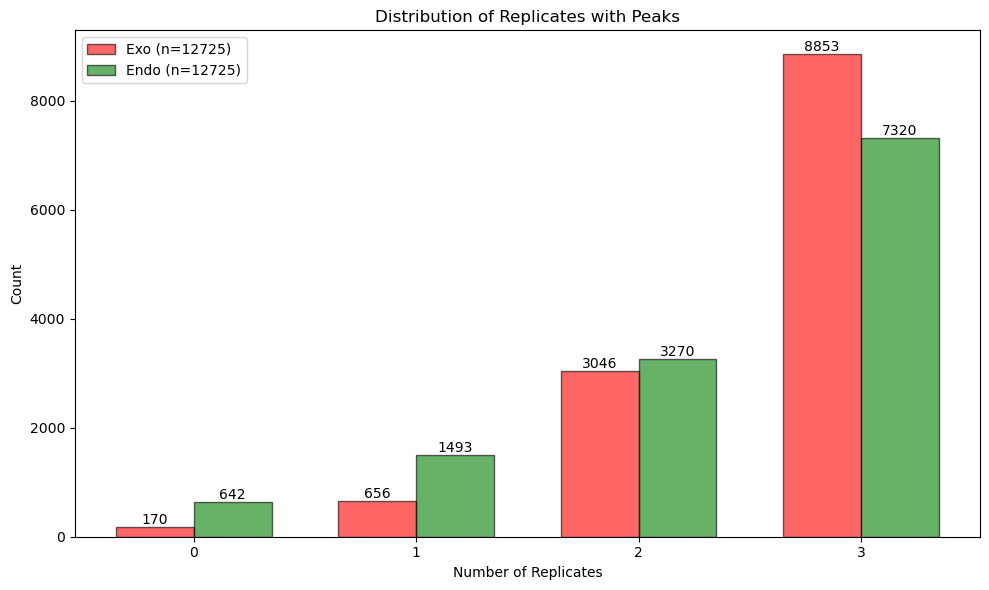

In [35]:
# Create single plot
plt.figure(figsize=(10, 6))

# Get data for plotting
x = np.arange(4)  # 0 through 3 replicates
exo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['exo_replicates_with_peaks'] == i]) for i in range(4)]
endo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['endo_replicates_with_peaks'] == i]) for i in range(4)]

# Plot bars side by side
width = 0.35
plt.bar(x - width/2, exo_counts, width, label=f'Exo (n={sum(exo_counts)})', color='red', alpha=0.6, edgecolor='black')
plt.bar(x + width/2, endo_counts, width, label=f'Endo (n={sum(endo_counts)})', color='green', alpha=0.6, edgecolor='black')

# Add value labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, exo_counts[i], str(exo_counts[i]), 
             ha='center', va='bottom')
    plt.text(x[i] + width/2, endo_counts[i], str(endo_counts[i]),
             ha='center', va='bottom')

plt.title('Distribution of Replicates with Peaks')
plt.xlabel('Number of Replicates')
plt.ylabel('Count')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Split data based on binding type

## By signal value

Non zero signal in minumum 2 replicates

In [37]:
# Split data based on binding type
exo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'exo_only']
endo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'endo_only'] 
both_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_signal)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_signal)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_signal)}")


Number of CpG islands bound by exo only: 638
Number of CpG islands bound by endo only: 353
Number of CpG islands bound by both: 11734


## By peaks number

Minimum 2 replicates with peaks

In [38]:
# Split data based on binding type
exo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'exo_only']
endo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'endo_only'] 
both_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_peaks)}")


Number of CpG islands bound by exo only: 2135
Number of CpG islands bound by endo only: 826
Number of CpG islands bound by both: 9764


# Data analysis

## Both: enrichment distribution

In [39]:
print("Summary statistics of enrichment values selected by signal:")
print(both_df_by_signal['enrichment'].describe())

print("\nSummary statistics of enrichment values selected by peaks:")
print(both_df_by_peaks['enrichment'].describe())

Summary statistics of enrichment values selected by signal:
count    11734.000000
mean         2.427418
std          5.616776
min          0.006678
25%          0.965196
50%          1.490519
75%          2.422003
max        303.383990
Name: enrichment, dtype: float64

Summary statistics of enrichment values selected by peaks:
count    9764.000000
mean             inf
std              NaN
min         0.000000
25%         0.958668
50%         1.434999
75%         2.209569
max              inf
Name: enrichment, dtype: float64


/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


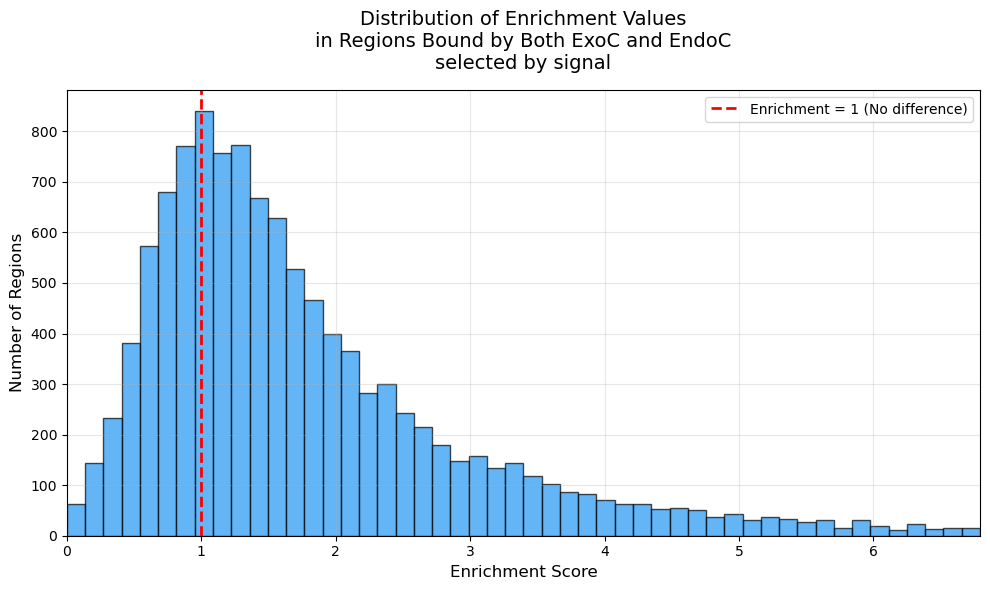

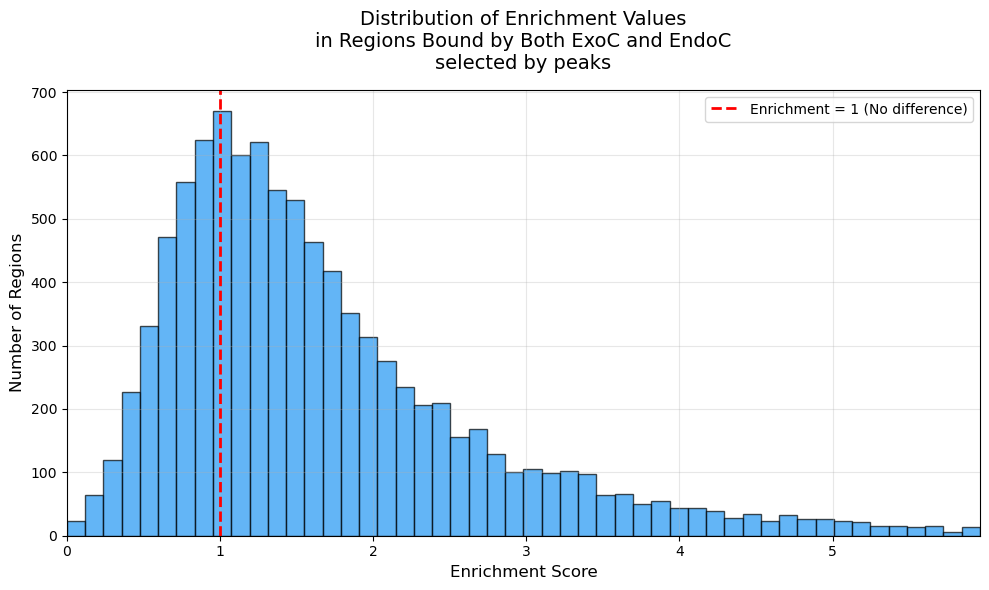

In [40]:
range_min_signal, range_max_signal = plot_enrichment_distribution(both_df_by_signal, title="selected by signal")
range_min_peaks, range_max_peaks = plot_enrichment_distribution(both_df_by_peaks, title="selected by peaks")


## Both: enrichment outliers

In [41]:
outliers_df_signal = both_df_by_signal[both_df_by_signal['enrichment'] > range_max_signal].copy()
print(f"\nNumber of outliers selected by signal(enrichment > {range_max_signal}):", len(outliers_df_signal))

outliers_df_peaks = both_df_by_peaks[both_df_by_peaks['enrichment'] > range_max_peaks].copy()
print(f"\nNumber of outliers selected by peaks(enrichment > {range_max_peaks}):", len(outliers_df_peaks))


Number of outliers selected by signal(enrichment > 6.792424132898567): 533

Number of outliers selected by peaks(enrichment > 5.962270709613568): 291


In [42]:
outliers_df_signal.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
11374,chr8,84638667,84638870,203,1230,CpG:,73.499867,0.242267,303.383990,0.2,both,exo_only,False,3,2,3,3,"68.39530895966027,28.052704905054252,124.05158695916236","0.7001379229165063,0.0,0.02666246303783849",1,0,5.19068;5.80735;4.31003,6.68317,84638667,84638870,203,39.357242,0.323947,0.535474,1.337149,3,1
11501,chr8,105605286,105605677,391,1390,CpG:,32.559190,0.215043,151.407607,0.2,both,exo_only,False,3,2,3,3,"48.06176517808529,5.741712797023451,43.87409305816416","0.0,0.5528452792740843,0.09228460014323749",1,0,6.03285;6.77288;6.82641,6.21096,105605286,105605677,391,19.039730,0.241815,0.584773,1.124495,3,1
5220,chr17,57105296,57105796,500,1020,CpG:,55.504278,0.386726,143.523377,0.2,both,exo_only,False,3,2,3,3,"32.410447860717774,49.39609769058227,84.70628746032715","0.0,0.46737918853759763,0.6927999877929687",1,1,7.45714;4.31357;5.16239,2.34948,57105296,57105796,500,21.782196,0.288527,0.392442,0.746075,3,1
8427,chr4,137993957,137994345,388,1637,CpG:,81.131400,0.587051,138.201699,0.2,both,exo_only,False,3,2,3,3,"139.42613884345772,17.203281960536525,86.76477904172287","0.9009210796085829,0.0,0.8602309273075812",1,0,8.9891;6.73221;7.45537,NaN,137993957,137994345,388,50.056021,0.415440,0.616975,0.707673,3,0
9303,chr5,138441448,138441854,406,1641,CpG:,82.176841,0.621690,132.182948,0.2,both,exo_only,False,3,2,3,3,"59.582037333784434,105.81387818623058,81.1346062674311","1.778732317421824,0.08633822408215754,0.0",1,0,10.5882;5.74697;8.3099,NaN,138441448,138441854,406,18.888453,0.818911,0.229851,1.317234,3,0


In [43]:
print_outlier_groups(outliers_df_signal, "signal")


First 5 outliers selected by signal:
chr8:84,638,667-84,638,870                        enrichment: 303.3839897241441
chr8:105,605,286-105,605,677                      enrichment: 151.40760666905524
chr17:57,105,296-57,105,796                       enrichment: 143.52337674106226
chr4:137,993,957-137,994,345                      enrichment: 138.20169916616592
chr5:138,441,448-138,441,854                      enrichment: 132.18294766944598

Middle 5 outliers selected by signal:
chr17:15,830,543-15,831,266                       enrichment: 10.152876975346688
chr5:117,287,306-117,287,722                      enrichment: 10.049660002128077
chr4:57,141,905-57,142,146                        enrichment: 10.033124726170664
chr13:93,771,714-93,772,156                       enrichment: 9.972374025729902
chr11:115,321,831-115,322,047                     enrichment: 9.959430874818649

Last 5 outliers selected by signal:
chr2:163,054,524-163,055,339                      enrichment: 6.859635765033256

In [44]:
n_rows = len(outliers_df_signal)

print("\nFirst 5 outliers selected by signal:")
for _, row in outliers_df_signal[:5].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

if n_rows > 10:
    mid_start = n_rows//2 - 2
    print("\nMiddle 5 outliers selected by signal:")
    for _, row in outliers_df_signal[mid_start:mid_start+5].iterrows():
        print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

print("\nLast 5 outliers selected by signal:")
for _, row in outliers_df_signal[-5:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")


First 5 outliers selected by signal:
chr8:84,638,667-84,638,870                        enrichment: 303.3839897241441
chr8:105,605,286-105,605,677                      enrichment: 151.40760666905524
chr17:57,105,296-57,105,796                       enrichment: 143.52337674106226
chr4:137,993,957-137,994,345                      enrichment: 138.20169916616592
chr5:138,441,448-138,441,854                      enrichment: 132.18294766944598

Middle 5 outliers selected by signal:
chr17:15,830,543-15,831,266                       enrichment: 10.152876975346688
chr5:117,287,306-117,287,722                      enrichment: 10.049660002128077
chr4:57,141,905-57,142,146                        enrichment: 10.033124726170664
chr13:93,771,714-93,772,156                       enrichment: 9.972374025729902
chr11:115,321,831-115,322,047                     enrichment: 9.959430874818649

Last 5 outliers selected by signal:
chr2:163,054,524-163,055,339                      enrichment: 6.859635765033256

In [45]:
print_outlier_groups(outliers_df_peaks, "peaks")


First 5 outliers selected by peaks:
chr9:34,486,091-34,486,336                        enrichment: inf
chr8:45,025,658-45,025,904                        enrichment: inf
chr2:26,138,465-26,138,848                        enrichment: 7465.04524773008
chr15:82,963,242-82,963,451                       enrichment: 1410.5327049910404
chr3:105,458,909-105,459,252                      enrichment: 472.08986556844354

Middle 5 outliers selected by peaks:
chr6:113,469,546-113,469,968                      enrichment: 8.52304362401873
chr1:192,834,625-192,835,051                      enrichment: 8.500468555779484
chr11:33,513,021-33,513,849                       enrichment: 8.459644329894873
chr11:102,924,799-102,925,274                     enrichment: 8.441192555632135
chr1:134,234,704-134,235,089                      enrichment: 8.438041844517208

Last 5 outliers selected by peaks:
chr2:74,578,529-74,579,138                        enrichment: 6.004778168552868
chr1:71,556,948-71,557,367           

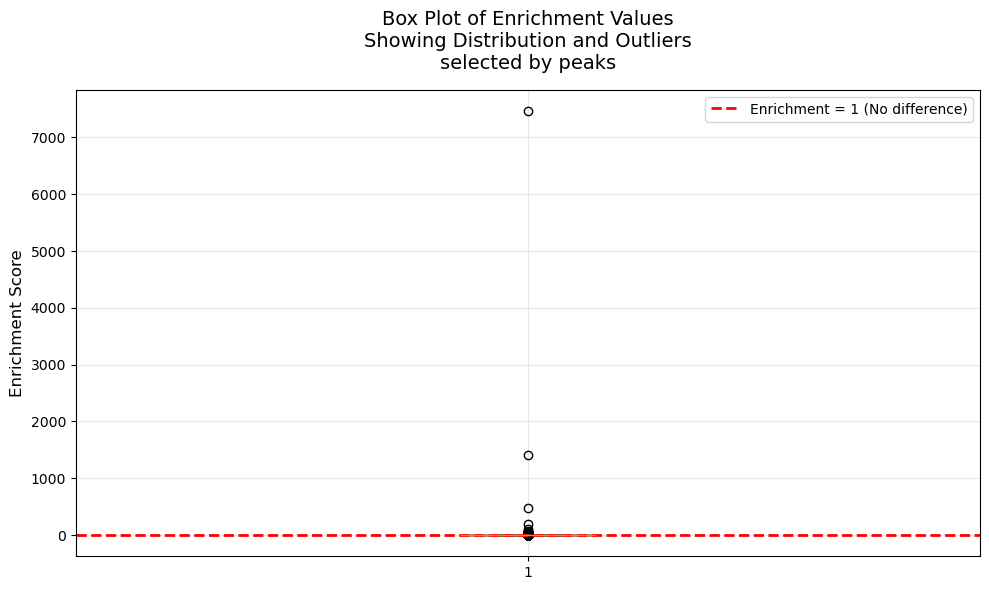

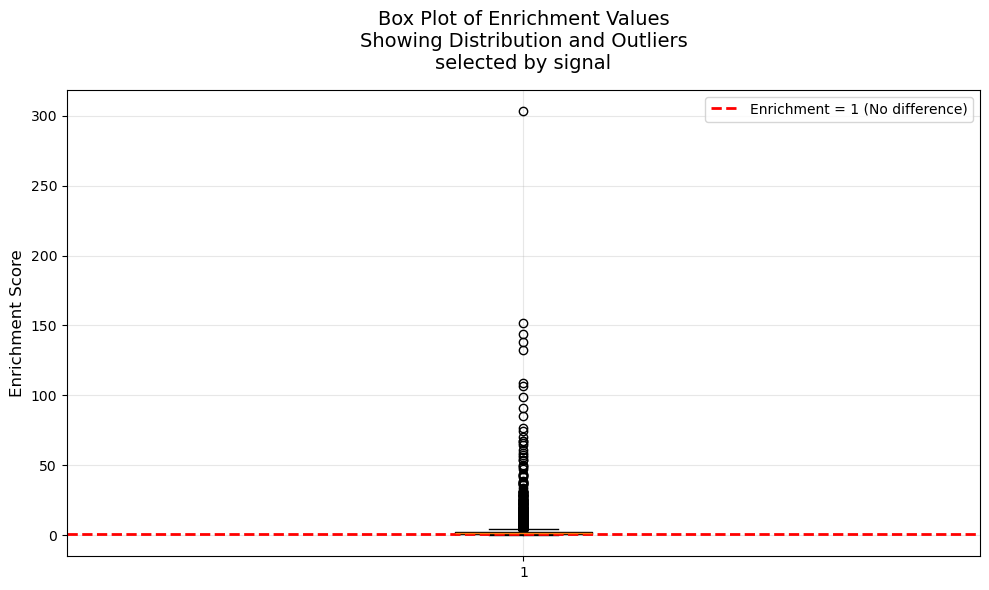

In [46]:
plot_enrichment_boxplot(both_df_by_peaks, title="selected by peaks")
plot_enrichment_boxplot(both_df_by_signal, title="selected by signal")

In [47]:
outliers_df_signal["endo_replicates_with_peaks"].value_counts()

signal_endo_zero_peaks  = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 0]
signal_endo_one_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 1]
signal_endo_two_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 2]
signal_endo_three_peaks = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 3]

outliers_df_peaks["endo_replicates_with_peaks"].value_counts()

peaks_endo_zero_peaks  = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 0]
peaks_endo_one_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 1]
peaks_endo_two_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 2]
peaks_endo_three_peaks = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 3]

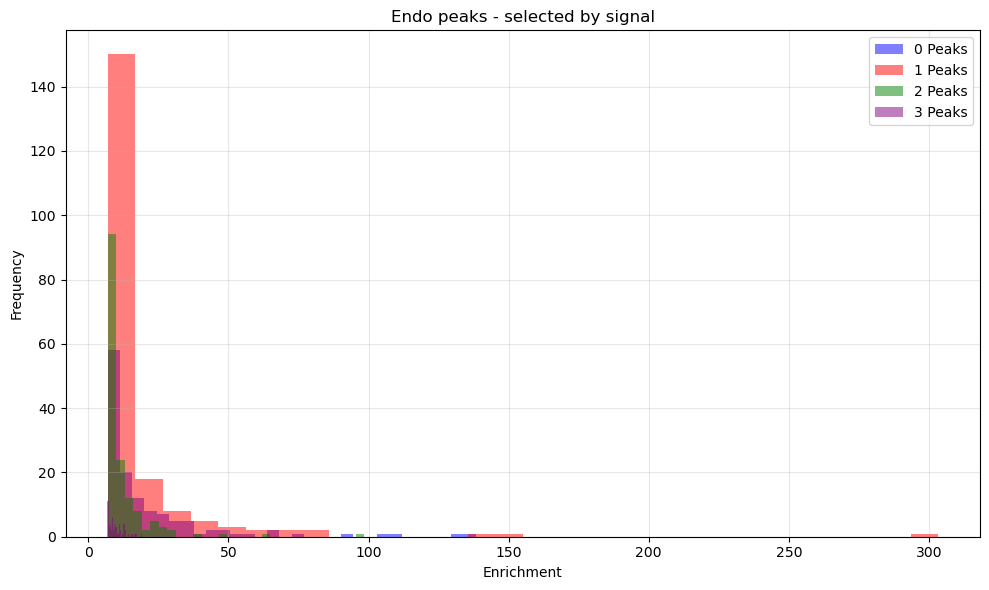

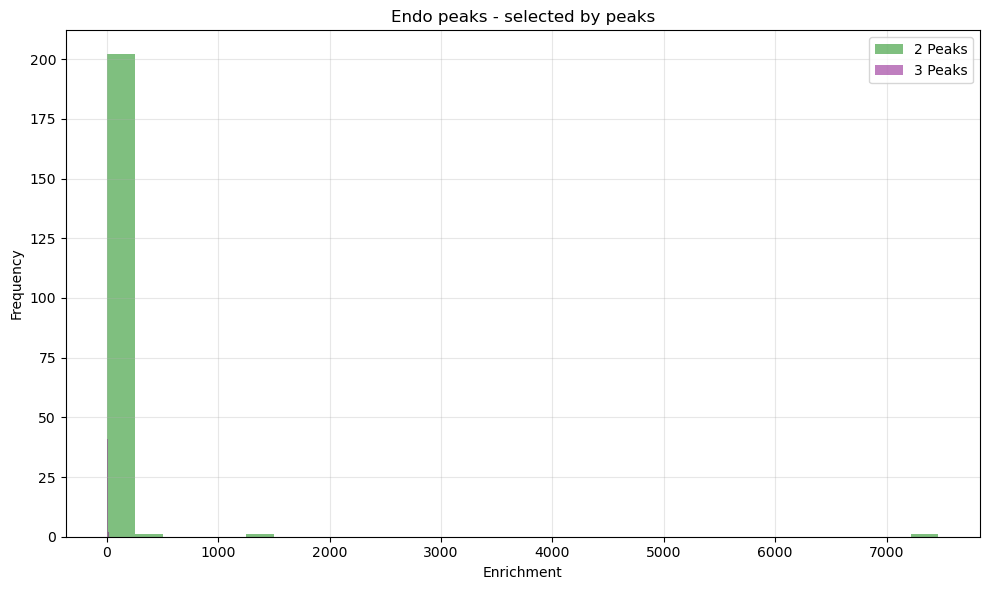

In [48]:
# Classify and plot for signal and peaks outliers
peaks_zero_peaks_signal, peaks_one_peaks_signal, peaks_two_peaks_signal, peaks_three_peaks_signal = plot_by_peaks(outliers_df_signal, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by signal")
peaks_zero_peaks_peaks, peaks_one_peaks_peaks, peaks_two_peaks_peaks, peaks_three_peaks_peaks = plot_by_peaks(outliers_df_peaks, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by peaks")

In [49]:
print_outlier_groups(peaks_two_peaks_peaks, "peaks")


First 5 outliers selected by peaks:
chr9:34,486,091-34,486,336                        enrichment: inf
chr8:45,025,658-45,025,904                        enrichment: inf
chr2:26,138,465-26,138,848                        enrichment: 7465.04524773008
chr15:82,963,242-82,963,451                       enrichment: 1410.5327049910404
chr3:105,458,909-105,459,252                      enrichment: 472.08986556844354

Middle 5 outliers selected by peaks:
chr16:20,498,869-20,499,147                       enrichment: 9.005830791429139
chr11:115,323,362-115,323,699                     enrichment: 8.955119099223042
chr11:4,118,464-4,118,842                         enrichment: 8.769718640793087
chr9:86,695,381-86,696,045                        enrichment: 8.723638229797125
chr11:102,945,902-102,946,867                     enrichment: 8.572849590899978

Last 5 outliers selected by peaks:
chr15:25,713,785-25,714,189                       enrichment: 6.09741854706739
chr4:133,545,659-133,546,166         

In [50]:
print_outlier_groups(peaks_two_peaks_signal, "signal")


First 5 outliers selected by signal:
chr2:29,619,879-29,620,185                        enrichment: 98.46285644555203
chr9:44,134,631-44,135,365                        enrichment: 64.17745386502095
chr17:83,215,491-83,215,722                       enrichment: 47.55000080965908
chr9:56,864,984-56,865,213                        enrichment: 38.1448014893021
chr2:132,029,074-132,029,328                      enrichment: 28.61953859927308

Middle 5 outliers selected by signal:
chrX:166,238,827-166,239,469                      enrichment: 9.291151661640733
chr4:120,286,819-120,288,121                      enrichment: 9.16415258539273
chr5:107,288,822-107,289,663                      enrichment: 9.15131843514889
chr15:76,710,137-76,710,999                       enrichment: 9.130943896000993
chr16:4,886,293-4,886,668                         enrichment: 9.048310131181024

Last 5 outliers selected by signal:
chr7:99,979,742-99,980,503                        enrichment: 6.99130725405397
chr5:38,27

## IGV: examples

## Regions length distribution

### CpG length - defined by the CpG coordinates

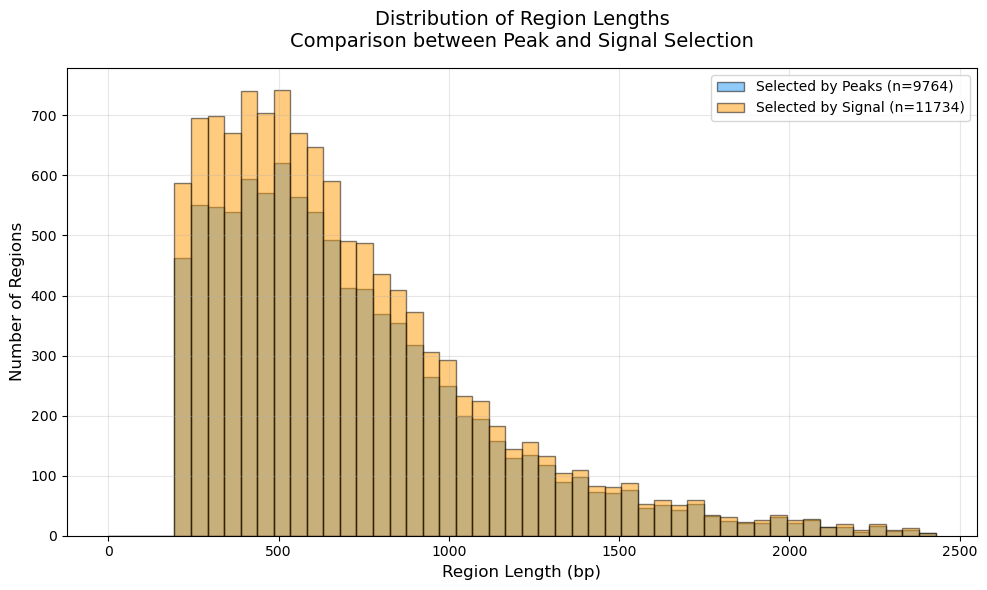

In [51]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='cpg_length')

In [52]:
both_df_sorted_by_cpg_length_peaks = both_df_by_peaks.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_peaks.head()
print_outlier_groups(both_df_sorted_by_cpg_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr8:92,355,697-92,360,826                        enrichment: 1.4677819359572175
chr5:33,430,439-33,435,552                        enrichment: 1.8037131008868768
chrX:12,086,982-12,092,060                        enrichment: 1.097693232908178
chrX:12,076,861-12,081,915                        enrichment: 1.5051353762337012
chr17:34,118,396-34,122,981                       enrichment: 0.8140642566667847

Middle 5 outliers selected by peaks:
chr7:130,546,808-130,547,429                      enrichment: 2.1581862172148374
chr6:56,797,254-56,797,875                        enrichment: 2.2963114154478834
chr1:132,417,369-132,417,990                      enrichment: 5.372098943012862
chr1:60,098,156-60,098,777                        enrichment: 1.3807676703728198
chr18:34,624,016-34,624,637                       enrichment: 1.332336997152845

Last 5 outliers selected by peaks:
chr10:80,406,713-80,406,914                       enrichment: 2.4300858202963425
c

In [53]:
both_df_sorted_by_cpg_length_signal = both_df_by_signal.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_signal.head()
print_outlier_groups(both_df_sorted_by_cpg_length_signal, "signal")


First 5 outliers selected by signal:
chr8:92,355,697-92,360,826                        enrichment: 1.4677819359572175
chr5:33,430,439-33,435,552                        enrichment: 1.8037131008868768
chrX:12,086,982-12,092,060                        enrichment: 1.097693232908178
chrX:12,076,861-12,081,915                        enrichment: 1.5051353762337012
chr17:34,118,396-34,122,981                       enrichment: 0.8140642566667847

Middle 5 outliers selected by signal:
chr7:109,985,941-109,986,550                      enrichment: 1.337455976764848
chr2:112,265,478-112,266,086                      enrichment: 6.6242357276658295
chr5:74,092,912-74,093,520                        enrichment: 1.1570109074968933
chr14:46,787,831-46,788,439                       enrichment: 1.4430539005508556
chr19:6,933,720-6,934,328                         enrichment: 3.112817448719155

Last 5 outliers selected by signal:
chr11:85,310,616-85,310,817                       enrichment: 1.646938097041621

### IGV: examples

# Exo only

In [54]:
exo_only_df_by_peaks.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
8848,chr5,66026483,66027191,708,1088,CpG:,7.553329,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,3,"14.231201559810316,5.95429288734824,2.474491431888214","0.0,0.0,0.0",0,0,5.41775;2.28533,NaN,66026483,66027191,708,4.931041,0.0,0.652830,0.0,2,0
12167,chr9,91362347,91362603,256,1282,CpG:,15.811198,0.0,inf,1.0,exo_only,exo_only,False,2,0,3,3,"23.07369440793991,24.359898686408997,0.0","0.0,0.0,0.0",0,0,3.89092;4.64152,NaN,91362347,91362603,256,11.192529,0.0,0.707886,0.0,2,0
11442,chr8,92855270,92855643,373,1293,CpG:,14.211426,0.0,inf,1.0,exo_only,exo_only,False,2,0,3,3,"34.491195883252345,8.14308064233202,0.0","0.0,0.0,0.0",0,0,8.08454;5.17447,NaN,92855270,92855643,373,14.720264,0.0,1.035805,0.0,2,0
7618,chr3,117360092,117360314,222,1480,CpG:,25.215928,0.0,inf,1.0,exo_only,exo_only,False,2,0,3,3,"45.58104981495453,0.0,30.066734949747723","0.0,0.0,0.0",1,0,3.06725;5.55883,NaN,117360092,117360314,222,18.921870,0.0,0.750394,0.0,2,0
387,chr1,119189576,119189828,252,1494,CpG:,26.400673,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,3,"0.6872444682651095,22.079763927156964,56.435010758657306","0.0,0.0,0.0",1,0,7.21055;3.28894,NaN,119189576,119189828,252,22.963102,0.0,0.869792,0.0,2,0


In [55]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'cpg_length', 'pvalue']

stats_df = exo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by peaks, size:", len(exo_only_df_by_peaks))
stats_df

Exo only - by peaks, size: 2135


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,2135.000000,2135.000000,2020.000000,2135.000000,2135.000000
mean,25.759738,8.353972,18.038404,610.352225,0.587260
std,19.157374,8.246702,126.634347,417.399846,0.312009
min,0.000000,0.000000,0.000000,201.000000,0.100000
25%,12.440914,2.327885,1.629034,322.500000,0.333333
50%,20.448130,6.083477,3.212810,491.000000,0.666667
75%,34.341541,11.500245,7.449963,755.500000,0.800000
max,144.064528,55.418640,3617.883227,3388.000000,1.000000


In [56]:
stats_df = exo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by signal, size:", len(exo_only_df_by_signal))
stats_df

Exo only - by signal, size: 638


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,638.000000,638.000000,517.000000,638.000000,638.000000
mean,22.145936,3.947674,72.129608,460.695925,0.795455
std,16.363640,5.835341,412.950408,322.213895,0.212964
min,0.343914,0.000000,0.165144,201.000000,0.500000
25%,10.744949,0.184584,2.532362,261.000000,0.666667
50%,18.232762,1.765238,6.673273,358.000000,0.833333
75%,28.591254,5.512981,24.111785,546.000000,1.000000
max,119.321654,43.714972,7465.045248,3150.000000,1.000000


In [57]:
print_across_distribution(exo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr5:66,026,483-66,027,191                        enrichment: inf
chr9:91,362,347-91,362,603                        enrichment: inf
chr8:92,855,270-92,855,643                        enrichment: inf
chr3:117,360,092-117,360,314                      enrichment: inf
chr1:119,189,576-119,189,828                      enrichment: inf

Middle 5 elements selected by peaks:
chr11:77,489,423-77,490,134                       enrichment: 3.4904509349818267
chr4:93,334,723-93,335,771                        enrichment: 3.4894835709995564
chr4:131,836,379-131,838,503                      enrichment: 3.479571558174457
chr2:25,706,654-25,707,411                        enrichment: 3.4730188086002736
chr16:13,940,703-13,941,101                       enrichment: 3.472310679875807

Last 5 elements selected by peaks:
chr7:89,403,437-89,403,742                        enrichment: 0.0219119577624906
chr7:100,582,775-100,583,160                      enrichment: 0.01148212639

In [58]:
print_across_distribution(exo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr5:66,026,483-66,027,191                        enrichment: inf
chr9:91,362,347-91,362,603                        enrichment: inf
chr8:92,855,270-92,855,643                        enrichment: inf
chr3:117,360,092-117,360,314                      enrichment: inf
chr1:119,189,576-119,189,828                      enrichment: inf

Middle 5 elements selected by signal:
chr16:4,726,299-4,726,876                         enrichment: 11.666618141454109
chr2:158,375,542-158,375,765                      enrichment: 11.437495359706208
chr11:115,447,896-115,448,233                     enrichment: 11.417745287540074
chr11:105,164,810-105,166,296                     enrichment: 11.359238255179854
chr17:26,932,925-26,933,471                       enrichment: 11.239361694444458

Last 5 elements selected by signal:
chr3:88,365,848-88,366,065                        enrichment: 0.2468185626611428
chr3:108,086,240-108,086,696                      enrichment: 0.244402

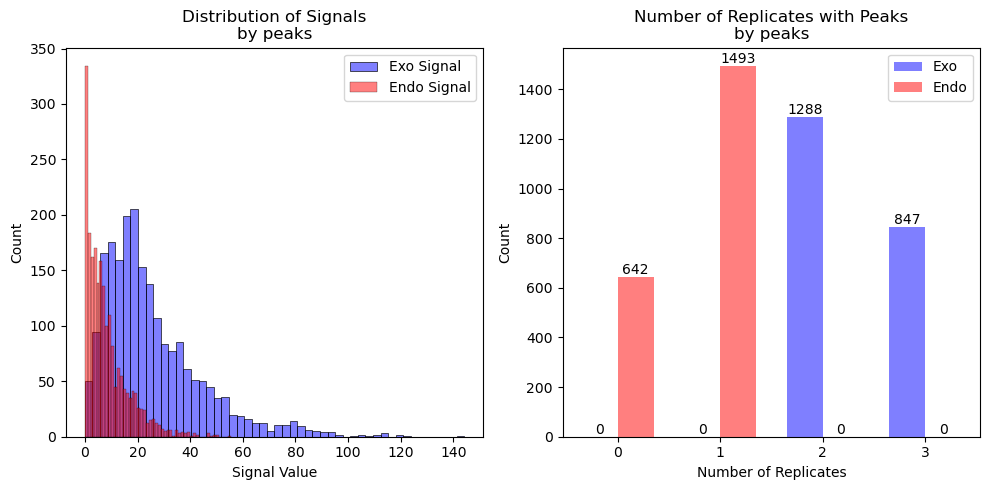

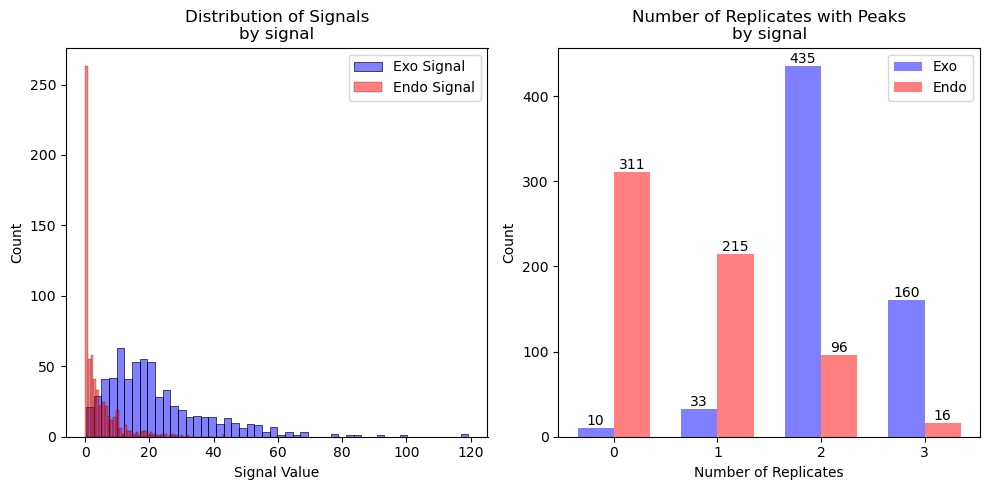

In [59]:
plot_exo_only_distributions_no_length_distribution(exo_only_df_by_peaks, title="by peaks")
plot_exo_only_distributions_no_length_distribution(exo_only_df_by_signal, title="by signal")

# Endo only

In [60]:
endo_only_df_by_peaks.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
9327,chr5,140606404,140606620,216,1657,CpG:,15.286032,0.000000,inf,1.000000,exo_only,endo_only,False,3,0,3,3,"0.47248057193226284,1.7118791341781616,43.67373726103041","0.0,0.0,0.0",1,1,4.18895,8.35333;5.98148;7.76402,140606404,140606620,216,20.079515,0.000000,1.313586,0.000000,1,3
2210,chr11,102994927,102995168,241,1370,CpG:,11.435412,0.000000,inf,1.000000,exo_only,endo_only,False,2,0,3,3,"28.80224373924287,5.50399076691307,0.0","0.0,0.0,0.0",0,1,4.0427,5.22351;4.97542,102994927,102995168,241,12.484087,0.000000,1.091704,0.000000,1,2
7431,chr3,89322861,89323083,222,1266,CpG:,12.797195,0.000000,inf,1.000000,exo_only,endo_only,False,2,0,3,3,"26.036349837844437,0.0,12.355234704576096","0.0,0.0,0.0",0,1,4.76801,7.19245;7.52913;4.42386,89322861,89323083,222,10.633888,0.000000,0.830955,0.000000,1,3
11468,chr8,95633469,95633889,420,1314,CpG:,21.719269,0.000000,inf,1.000000,exo_only,endo_only,False,2,0,3,3,"30.793460834594,0.0,34.364347258068264","0.0,0.0,0.0",1,1,8.99633,9.33805;8.19555,95633469,95633889,420,15.426877,0.000000,0.710285,0.000000,1,2
10659,chr7,100285530,100285761,231,1350,CpG:,14.466311,0.210759,68.639104,0.666667,exo_only,endo_only,False,2,1,3,3,"8.086279068158303,0.0,35.31265252183526","0.0,0.6322770717340115,0.0",1,0,10.4976,6.59382;4.94095,100285530,100285761,231,15.105726,0.298058,1.044200,1.414214,1,2


In [61]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'cpg_length', 'pvalue']

stats_df = endo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by peaks, size:", len(endo_only_df_by_peaks))
stats_df

endo only - by peaks, size: 826


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,826.000000,826.000000,822.000000,826.000000,826.000000
mean,10.893262,17.127533,1.308272,521.768765,0.709645
std,11.110977,12.458530,3.845115,327.799441,0.274790
min,0.000000,0.000000,0.000000,201.000000,0.100000
25%,2.905709,8.270190,0.204084,291.000000,0.500000
50%,8.156792,14.040329,0.576107,414.500000,0.700000
75%,15.946684,22.918402,1.161134,649.500000,1.000000
max,137.709746,79.799615,68.639104,2807.000000,1.000000


In [62]:
stats_df = endo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by signal, size:", len(endo_only_df_by_signal))
stats_df

endo only - by signal, size: 353


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,353.000000,353.000000,353.000000,353.000000,353.000000
mean,6.451095,16.370761,1.038543,410.747875,0.771955
std,8.019989,12.177098,3.310506,257.555668,0.209113
min,0.000000,0.086617,0.000000,201.000000,0.500000
25%,0.454377,7.503153,0.030373,251.000000,0.666667
50%,3.427939,13.399928,0.268110,332.000000,0.666667
75%,9.323279,23.405836,0.882608,482.000000,1.000000
max,52.935045,76.996508,43.381714,2807.000000,1.000000


In [63]:
print_across_distribution(endo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr5:140,606,404-140,606,620                      enrichment: inf
chr11:102,994,927-102,995,168                     enrichment: inf
chr3:89,322,861-89,323,083                        enrichment: inf
chr8:95,633,469-95,633,889                        enrichment: inf
chr7:100,285,530-100,285,761                      enrichment: 68.6391038520068

Middle 5 elements selected by peaks:
chr17:24,533,196-24,533,842                       enrichment: 0.5802579744639874
chr2:34,913,253-34,913,496                        enrichment: 0.5792642426486962
chr11:4,266,612-4,267,106                         enrichment: 0.577868092517499
chr17:87,745,987-87,746,792                       enrichment: 0.5767563127275879
chr2:151,701,994-151,702,987                      enrichment: 0.5754586332629835

Last 5 elements selected by peaks:
chr17:35,835,357-35,835,711                       enrichment: 0.0
chr10:120,105,431-120,105,744                     enrichment: 0.0
chr11:63,8

In [64]:
print_across_distribution(endo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr11:114,786,357-114,786,681                     enrichment: 43.38171387350065
chr19:5,082,454-5,082,810                         enrichment: 25.53325631041182
chr7:44,527,968-44,528,207                        enrichment: 22.334056338966345
chr14:67,235,403-67,236,476                       enrichment: 18.61185967183112
chr9:107,598,789-107,599,151                      enrichment: 11.942412463674929

Middle 5 elements selected by signal:
chr17:24,649,840-24,650,287                       enrichment: 0.2698075770633763
chr5:112,326,118-112,326,567                      enrichment: 0.2683334667670423
chr17:56,762,028-56,762,269                       enrichment: 0.2681103480813978
chr2:151,970,018-151,970,419                      enrichment: 0.2662348908703181
chr2:30,824,153-30,824,405                        enrichment: 0.2570299312758314

Last 5 elements selected by signal:
chr17:35,835,357-35,835,711                       enrichment: 0.0
chr10:120,105

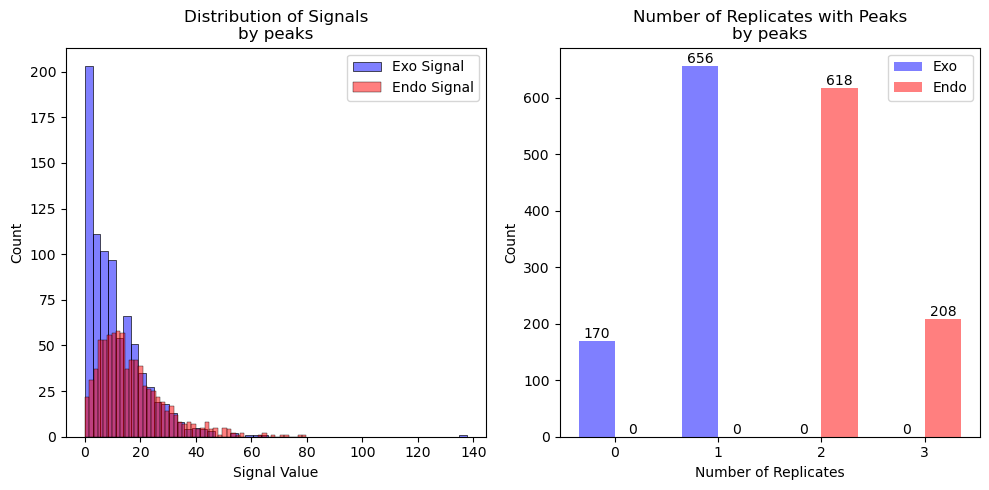

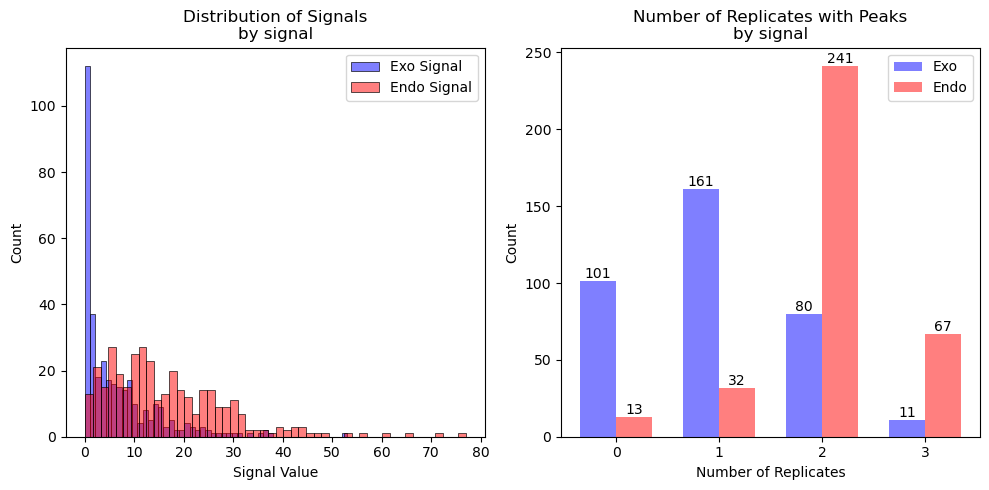

In [65]:
plot_exo_only_distributions_no_length_distribution(endo_only_df_by_peaks, title="by peaks")
plot_exo_only_distributions_no_length_distribution(endo_only_df_by_signal, title="by signal")